In [4]:
import numpy as np
import pandas as pd
import umap
from matplotlib import pyplot as plt

#change the file path based on you file system
data = np.load("..\data\\thingseeg2_preproc\sub-01\preprocessed_eeg_training.npy", allow_pickle=True).item()
data1 = np.load("..\data\\thingseeg2_preproc\sub-02\preprocessed_eeg_training.npy", allow_pickle=True).item()

In [5]:
#extract eeg data
eeg_data = data["preprocessed_eeg_data"][:, :, :, 20:101]
eeg_data_1 = data1["preprocessed_eeg_data"][:, :, :, 20:101]

In [6]:
eeg_data.shape

(16540, 4, 17, 80)

In [ ]:
# test cell
test_eeg_data = eeg_data[0][0]
mean = np.mean(test_eeg_data, 1)
transposed = np.transpose(test_eeg_data)
plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1.5, 1.5], 'k--')
plt.plot(np.transpose(test_eeg_data))

In [7]:
# mean by trial and reshape 17*100 -> 1700*1 vector
# combine data from two subjects
mean_by_trial = np.mean(eeg_data, 1)
reshaped_data = mean_by_trial.reshape(16540, 1360)

mean_by_trial = np.mean(eeg_data_1, 1)
reshaped_data_1 = mean_by_trial.reshape(16540, 1360)

reshaped = np.append(reshaped_data, reshaped_data_1, 0)
print(reshaped.shape)

(33080, 1360)


In [8]:
# train umap and display
umap_func = umap.UMAP()
u = umap_func.fit_transform(reshaped)

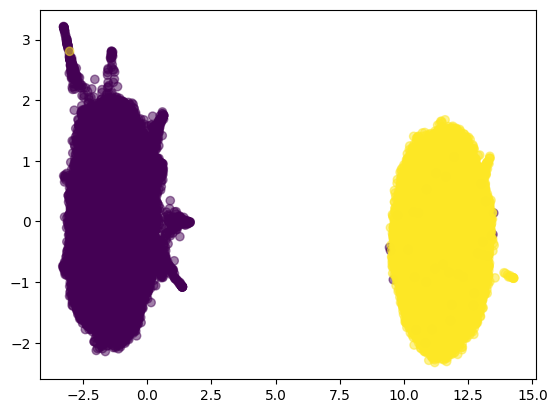

In [9]:
k = 1654
color = np.append(np.zeros(k*10), np.ones(k*10))

u_to_diaplay = np.append(u[0:k*10], u[16540:16540+k*10], 0)
plt.figure()
plt.scatter(u_to_diaplay[:, 0], u_to_diaplay[:, 1], c=color, alpha=0.5)